In [1]:
#imports
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [14]:
#load and format training dataset
df = pd.read_csv("results_train.csv", encoding="utf-8")
df['err'] = df['xgboost_tmp2m_pred'] - df['tmp2m']
df['lon2'] = df['lon']-360
df['latlon'] = df['lat'].astype(str) + "|" + df['lon'].astype(str)
df['start_date'] = pd.to_datetime(df['start_date'])
df['month'] = pd.DatetimeIndex(df['start_date']).month
df['month2'] = df['month'].astype(str).str.zfill(2)
df['year'] = pd.DatetimeIndex(df['start_date']).year
df['yearmonth'] = df['year'].astype(str) + '-' + df['month2'].astype(str)
df['date'] = pd.DatetimeIndex(df['start_date']).day
df['date2'] = df['date'].astype(str).str.zfill(2)
df['err'] = round(df['err'],3)
df['phys_err'] = round(df['phys_err'],3)

#Seasons
def season (x):
    if x in [12,1,2]:
        return 'winter'
    elif x in [3,4,5]:
        return 'spring'
    elif x in [6,7,8]:
        return 'summer'
    elif x in [9,10,11]:
        return 'fall'

#Locations
locations = pd.read_csv("locations.csv", encoding="utf-8")
locations.rename(columns={"Location": "latlon"}, inplace=True)
locations.sort_values(by=['latlon'], ascending=False)


#Map season and location and extremes
df['season'] = df['month'].apply(season)
df = pd.merge(df, locations, on='latlon')
df['heatwave'] = df['tmp2m'] >34
df['coldwave'] = df['tmp2m'] <-10

#Functions / Metrics
def mbe (x):
    return round(np.mean(x),3)

def mae (x):
    return round(np.mean(abs(x)), 3)

def sd (x):
    return round(np.std(x), 3)

df

,Unnamed: 0,Unnamed: 0.1,key,start_date,lat,lon,xgboost_tmp2m_pred_zscore,tmp2m_daily_mean,tmp2m_daily_std,tmp2m_zscore,...,year,yearmonth,date,date2,season,State,Sub-Region,Region,heatwave,coldwave
0,0,0,2021-06-06|27.25|261.75,2021-06-06,27.25,261.75,-0.365524,29.645612,0.822407,-0.367244,...,2021,2021-06,6,06,summer,Texas,West South Central,South,False,False
1,197,197,2021-06-07|27.25|261.75,2021-06-07,27.25,261.75,-0.406849,29.625493,0.838394,-0.390544,...,2021,2021-06,7,07,summer,Texas,West South Central,South,False,False
2,394,394,2021-06-08|27.25|261.75,2021-06-08,27.25,261.75,-0.280444,29.631313,0.855013,-0.594564,...,2021,2021-06,8,08,summer,Texas,West South Central,South,False,False
3,591,0,2021-05-27|27.25|261.75,2021-05-27,27.25,261.75,-0.363251,29.609539,1.169933,-0.264761,...,2021,2021-05,27,27,spring,Texas,West South Central,South,False,False
4,788,197,2021-05-28|27.25|261.75,2021-05-28,27.25,261.75,-0.381108,29.631964,1.177269,-0.264970,...,2021,2021-05,28,28,spring,Texas,West South Central,South,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536623,140263,1181,2013-12-19|47.25|273.75,2013-12-19,47.25,273.75,-0.904409,-6.268636,3.717467,-0.955718,...,2013,2013-12,19,19,winter,Michigan,East North Central,Midwest,False,False
536624,140460,1378,2013-12-20|47.25|273.75,2013-12-20,47.25,273.75,-0.904409,-6.439524,3.732835,-0.719103,...,2013,2013-12,20,20,winter,Michigan,East North Central,Midwest,False,False
536625,140657,1575,2013-12-21|47.25|273.75,2013-12-21,47.25,273.75,-0.904409,-6.520265,3.668464,-0.743973,...,2013,2013-12,21,21,winter,Michigan,East North Central,Midwest,False,False
536626,140854,1772,2013-12-22|47.25|273.75,2013-12-22,47.25,273.75,-0.878938,-6.646918,3.681086,-0.836155,...,2013,2013-12,22,22,winter,Michigan,East North Central,Midwest,False,False


In [15]:
#filter out the overlap
df = df[df['start_date']<'2019-01-01']
df

,Unnamed: 0,Unnamed: 0.1,key,start_date,lat,lon,xgboost_tmp2m_pred_zscore,tmp2m_daily_mean,tmp2m_daily_std,tmp2m_zscore,...,year,yearmonth,date,date2,season,State,Sub-Region,Region,heatwave,coldwave
883,0,0,2018-12-29|27.25|261.75,2018-12-29,27.25,261.75,-0.057595,14.702227,2.866412,-0.252842,...,2018,2018-12,29,29,winter,Texas,West South Central,South,False,False
884,197,197,2018-12-30|27.25|261.75,2018-12-30,27.25,261.75,-0.098113,14.775914,2.747496,-0.364047,...,2018,2018-12,30,30,winter,Texas,West South Central,South,False,False
885,394,394,2018-12-31|27.25|261.75,2018-12-31,27.25,261.75,-0.105415,14.939033,2.615850,-0.368487,...,2018,2018-12,31,31,winter,Texas,West South Central,South,False,False
886,591,0,2018-12-19|27.25|261.75,2018-12-19,27.25,261.75,0.223795,14.102848,2.503313,0.257848,...,2018,2018-12,19,19,winter,Texas,West South Central,South,False,False
887,788,197,2018-12-20|27.25|261.75,2018-12-20,27.25,261.75,0.258854,14.231063,2.352766,0.405074,...,2018,2018-12,20,20,winter,Texas,West South Central,South,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536623,140263,1181,2013-12-19|47.25|273.75,2013-12-19,47.25,273.75,-0.904409,-6.268636,3.717467,-0.955718,...,2013,2013-12,19,19,winter,Michigan,East North Central,Midwest,False,False
536624,140460,1378,2013-12-20|47.25|273.75,2013-12-20,47.25,273.75,-0.904409,-6.439524,3.732835,-0.719103,...,2013,2013-12,20,20,winter,Michigan,East North Central,Midwest,False,False
536625,140657,1575,2013-12-21|47.25|273.75,2013-12-21,47.25,273.75,-0.904409,-6.520265,3.668464,-0.743973,...,2013,2013-12,21,21,winter,Michigan,East North Central,Midwest,False,False
536626,140854,1772,2013-12-22|47.25|273.75,2013-12-22,47.25,273.75,-0.878938,-6.646918,3.681086,-0.836155,...,2013,2013-12,22,22,winter,Michigan,East North Central,Midwest,False,False


In [16]:
climatology = pd.pivot_table(data=df, index=['month2','date2', 'latlon'], values=['tmp2m'], aggfunc=np.average)
climatology.rename(columns={'tmp2m':'climatology'}, inplace=True)
climatology = climatology.reset_index()
climatology['mdll'] = climatology['month2'] + "|" + climatology['date2'] + "|" + climatology['latlon']

In [17]:
#analyze testing data and derive
df_test = pd.read_csv("results_test.csv", encoding="utf-8")
df_test['err'] = df_test['xgboost_tmp2m_pred'] - df_test['tmp2m']
df_test['lon2'] = df_test['lon']-360
df_test['latlon'] = df_test['lat'].astype(str) + "|" + df_test['lon'].astype(str)
df_test['start_date'] = pd.to_datetime(df_test['start_date'])
df_test['month'] = pd.DatetimeIndex(df_test['start_date']).month
df_test['month2'] = df_test['month'].astype(str).str.zfill(2)
df_test['year'] = pd.DatetimeIndex(df_test['start_date']).year
df_test['yearmonth'] = df_test['year'].astype(str) + '-' + df_test['month2'].astype(str)
df_test['date'] = pd.DatetimeIndex(df_test['start_date']).day
df_test['date2'] = df_test['date'].astype(str).str.zfill(2)
df_test['err'] = round(df_test['err'],3)
df_test['phys_err'] = round(df_test['phys_err'],3)

#Seasons
def season (x):
    if x in [12,1,2]:
        return 'winter'
    elif x in [3,4,5]:
        return 'spring'
    elif x in [6,7,8]:
        return 'summer'
    elif x in [9,10,11]:
        return 'fall'

#Locations
locations = pd.read_csv("locations.csv", encoding="utf-8")
locations.rename(columns={"Location": "latlon"}, inplace=True)
locations.sort_values(by=['latlon'], ascending=False)


#Map season and location and extremes
df_test['season'] = df_test['month'].apply(season)
df_test = pd.merge(df_test, locations, on='latlon')
df_test['heatwave'] = df_test['tmp2m'] >34
df_test['coldwave'] = df_test['tmp2m'] <-10

#Functions / Metrics
def mbe (x):
    return round(np.mean(x),3)

def mae (x):
    return round(np.mean(abs(x)), 3)

def sd (x):
    return round(np.std(x), 3)

df_test['mdll'] = df_test['month2'] + "|" + df_test['date2'] + "|" + df_test['latlon']

In [18]:
#merge the test data with climatology to generate a new test set
df_test2 = pd.merge(df_test, climatology, on='mdll')
df_test2

,key,start_date,lat,lon,xgboost_tmp2m_pred_zscore,tmp2m_daily_mean,tmp2m_daily_std,tmp2m_zscore,tmp2m,xgboost_tmp2m_pred,...,State,Sub-Region,Region,heatwave,coldwave,mdll,month2_y,date2_y,latlon_y,climatology
0,2019-10-01|27.25|261.75,2019-10-01,27.25,261.75,1.028229,22.870967,2.045002,-0.014837,22.840626,24.973697,...,Texas,West South Central,South,False,False,10|01|27.25|261.75,10,01,27.25|261.75,22.407943
1,2019-10-08|27.25|261.75,2019-10-08,27.25,261.75,1.093624,21.721882,1.985609,-1.286955,19.166492,23.893391,...,Texas,West South Central,South,False,False,10|08|27.25|261.75,10,08,27.25|261.75,22.441165
2,2019-10-15|27.25|261.75,2019-10-15,27.25,261.75,1.043933,20.675154,2.121438,-1.040800,18.467161,22.889792,...,Texas,West South Central,South,False,False,10|15|27.25|261.75,10,15,27.25|261.75,22.130111
3,2019-10-22|27.25|261.75,2019-10-22,27.25,261.75,0.892237,19.451975,2.304340,-1.896681,15.081376,21.507993,...,Texas,West South Central,South,False,False,10|22|27.25|261.75,10,22,27.25|261.75,19.188970
4,2019-10-29|27.25|261.75,2019-10-29,27.25,261.75,0.883454,18.518180,2.384524,-1.176233,15.713424,20.624798,...,Texas,West South Central,South,False,False,10|29|27.25|261.75,10,29,27.25|261.75,17.238747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26393,2021-06-29|47.25|273.75,2021-06-29,47.25,273.75,-0.061508,15.384313,2.808936,0.734029,17.446154,15.211542,...,Michigan,East North Central,Midwest,False,False,06|29|47.25|273.75,06,29,47.25|273.75,12.946551
26394,2020-07-07|47.25|273.75,2020-07-07,47.25,273.75,-0.408582,16.091479,2.732136,-0.339037,15.165182,14.975177,...,Michigan,East North Central,Midwest,False,False,07|07|47.25|273.75,07,07,47.25|273.75,14.359718
26395,2020-07-14|47.25|273.75,2020-07-14,47.25,273.75,-0.268441,16.598514,2.503675,-0.350005,15.722215,15.926424,...,Michigan,East North Central,Midwest,False,False,07|14|47.25|273.75,07,14,47.25|273.75,15.126063
26396,2020-07-21|47.25|273.75,2020-07-21,47.25,273.75,-0.357121,16.739847,2.226671,0.118659,17.004061,15.944656,...,Michigan,East North Central,Midwest,False,False,07|21|47.25|273.75,07,21,47.25|273.75,15.914344


In [19]:
df_test2.drop(columns=['month2_y','date2_y','latlon_y'], axis=1, inplace=True)
df_test2 = df_test2.rename(columns={'month2_x':'month2', 'date2_x':'date2'})
df_test2

,key,start_date,lat,lon,xgboost_tmp2m_pred_zscore,tmp2m_daily_mean,tmp2m_daily_std,tmp2m_zscore,tmp2m,xgboost_tmp2m_pred,...,date,date2,season,State,Sub-Region,Region,heatwave,coldwave,mdll,climatology
0,2019-10-01|27.25|261.75,2019-10-01,27.25,261.75,1.028229,22.870967,2.045002,-0.014837,22.840626,24.973697,...,1,01,fall,Texas,West South Central,South,False,False,10|01|27.25|261.75,22.407943
1,2019-10-08|27.25|261.75,2019-10-08,27.25,261.75,1.093624,21.721882,1.985609,-1.286955,19.166492,23.893391,...,8,08,fall,Texas,West South Central,South,False,False,10|08|27.25|261.75,22.441165
2,2019-10-15|27.25|261.75,2019-10-15,27.25,261.75,1.043933,20.675154,2.121438,-1.040800,18.467161,22.889792,...,15,15,fall,Texas,West South Central,South,False,False,10|15|27.25|261.75,22.130111
3,2019-10-22|27.25|261.75,2019-10-22,27.25,261.75,0.892237,19.451975,2.304340,-1.896681,15.081376,21.507993,...,22,22,fall,Texas,West South Central,South,False,False,10|22|27.25|261.75,19.188970
4,2019-10-29|27.25|261.75,2019-10-29,27.25,261.75,0.883454,18.518180,2.384524,-1.176233,15.713424,20.624798,...,29,29,fall,Texas,West South Central,South,False,False,10|29|27.25|261.75,17.238747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26393,2021-06-29|47.25|273.75,2021-06-29,47.25,273.75,-0.061508,15.384313,2.808936,0.734029,17.446154,15.211542,...,29,29,summer,Michigan,East North Central,Midwest,False,False,06|29|47.25|273.75,12.946551
26394,2020-07-07|47.25|273.75,2020-07-07,47.25,273.75,-0.408582,16.091479,2.732136,-0.339037,15.165182,14.975177,...,7,07,summer,Michigan,East North Central,Midwest,False,False,07|07|47.25|273.75,14.359718
26395,2020-07-14|47.25|273.75,2020-07-14,47.25,273.75,-0.268441,16.598514,2.503675,-0.350005,15.722215,15.926424,...,14,14,summer,Michigan,East North Central,Midwest,False,False,07|14|47.25|273.75,15.126063
26396,2020-07-21|47.25|273.75,2020-07-21,47.25,273.75,-0.357121,16.739847,2.226671,0.118659,17.004061,15.944656,...,21,21,summer,Michigan,East North Central,Midwest,False,False,07|21|47.25|273.75,15.914344


In [20]:
df_test2.columns

Index(['key', 'start_date', 'lat', 'lon', 'xgboost_tmp2m_pred_zscore',
       'tmp2m_daily_mean', 'tmp2m_daily_std', 'tmp2m_zscore', 'tmp2m',
       'xgboost_tmp2m_pred', 'err', 'phys', 'phys_err', 'lon2', 'latlon_x',
       'month', 'month2', 'year', 'yearmonth', 'date', 'date2', 'season',
       'State', 'Sub-Region', 'Region', 'heatwave', 'coldwave', 'mdll',
       'climatology'],
      dtype='object')

In [21]:
#clim err
df_test2['clim_err'] = df_test2['climatology'] - df_test2['tmp2m']
df_test2['ml_outperforms_climatology'] = abs(df_test2['err']) < abs(df_test2['clim_err'])
df_test2['phys_outperforms_climatology'] = abs(df_test2['phys_err']) < abs(df_test2['clim_err'])

In [22]:
df_test2

,key,start_date,lat,lon,xgboost_tmp2m_pred_zscore,tmp2m_daily_mean,tmp2m_daily_std,tmp2m_zscore,tmp2m,xgboost_tmp2m_pred,...,State,Sub-Region,Region,heatwave,coldwave,mdll,climatology,clim_err,ml_outperforms_climatology,phys_outperforms_climatology
0,2019-10-01|27.25|261.75,2019-10-01,27.25,261.75,1.028229,22.870967,2.045002,-0.014837,22.840626,24.973697,...,Texas,West South Central,South,False,False,10|01|27.25|261.75,22.407943,-0.432683,False,False
1,2019-10-08|27.25|261.75,2019-10-08,27.25,261.75,1.093624,21.721882,1.985609,-1.286955,19.166492,23.893391,...,Texas,West South Central,South,False,False,10|08|27.25|261.75,22.441165,3.274672,False,True
2,2019-10-15|27.25|261.75,2019-10-15,27.25,261.75,1.043933,20.675154,2.121438,-1.040800,18.467161,22.889792,...,Texas,West South Central,South,False,False,10|15|27.25|261.75,22.130111,3.662949,False,True
3,2019-10-22|27.25|261.75,2019-10-22,27.25,261.75,0.892237,19.451975,2.304340,-1.896681,15.081376,21.507993,...,Texas,West South Central,South,False,False,10|22|27.25|261.75,19.188970,4.107594,False,True
4,2019-10-29|27.25|261.75,2019-10-29,27.25,261.75,0.883454,18.518180,2.384524,-1.176233,15.713424,20.624798,...,Texas,West South Central,South,False,False,10|29|27.25|261.75,17.238747,1.525323,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26393,2021-06-29|47.25|273.75,2021-06-29,47.25,273.75,-0.061508,15.384313,2.808936,0.734029,17.446154,15.211542,...,Michigan,East North Central,Midwest,False,False,06|29|47.25|273.75,12.946551,-4.499603,True,False
26394,2020-07-07|47.25|273.75,2020-07-07,47.25,273.75,-0.408582,16.091479,2.732136,-0.339037,15.165182,14.975177,...,Michigan,East North Central,Midwest,False,False,07|07|47.25|273.75,14.359718,-0.805464,True,False
26395,2020-07-14|47.25|273.75,2020-07-14,47.25,273.75,-0.268441,16.598514,2.503675,-0.350005,15.722215,15.926424,...,Michigan,East North Central,Midwest,False,False,07|14|47.25|273.75,15.126063,-0.596152,True,False
26396,2020-07-21|47.25|273.75,2020-07-21,47.25,273.75,-0.357121,16.739847,2.226671,0.118659,17.004061,15.944656,...,Michigan,East North Central,Midwest,False,False,07|21|47.25|273.75,15.914344,-1.089716,True,False


In [144]:
df_test2[df_test2['err'] < 0]

,key,start_date,lat,lon,xgboost_tmp2m_pred_zscore,tmp2m_daily_mean,tmp2m_daily_std,tmp2m_zscore,tmp2m,xgboost_tmp2m_pred,...,State,Sub-Region,Region,heatwave,coldwave,ymll,climatology,clim_err,ml_outperforms_climatology,phys_outperforms_climatology
5,2020-11-03|27.25|261.75,2020-11-03,27.25,261.75,0.449256,17.837884,2.095807,1.255484,20.469135,18.779438,...,Texas,West South Central,South,False,False,2020-11|27.25|261.75,16.380975,-4.088160,True,True
10,2019-02-12|27.25|261.75,2019-02-12,27.25,261.75,-0.158410,18.692156,2.993158,-0.138463,18.277714,18.218011,...,Texas,West South Central,South,False,False,2019-02|27.25|261.75,18.347242,0.069528,True,True
15,2020-02-18|27.25|261.75,2020-02-18,27.25,261.75,0.292526,19.697467,2.096384,1.470225,22.779623,20.310715,...,Texas,West South Central,South,False,False,2020-02|27.25|261.75,21.052197,-1.727426,False,False
16,2020-02-25|27.25|261.75,2020-02-25,27.25,261.75,0.379656,20.603701,1.620046,2.517399,24.682003,21.218760,...,Texas,West South Central,South,False,False,2020-02|27.25|261.75,21.052197,-3.629806,True,False
17,2019-07-02|27.25|261.75,2019-07-02,27.25,261.75,0.069551,30.184706,0.943342,0.086067,30.265896,30.250316,...,Texas,West South Central,South,False,False,2019-07|27.25|261.75,31.310989,1.045093,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25801,2021-06-22|47.25|273.75,2021-06-22,47.25,273.75,-0.083409,14.551011,2.957418,0.783467,16.868050,14.304336,...,Michigan,East North Central,Midwest,False,False,2021-06|47.25|273.75,11.561133,-5.306917,True,False
25802,2021-06-29|47.25|273.75,2021-06-29,47.25,273.75,-0.061508,15.384313,2.808936,0.734029,17.446154,15.211542,...,Michigan,East North Central,Midwest,False,False,2021-06|47.25|273.75,11.561133,-5.885021,True,False
25803,2020-07-07|47.25|273.75,2020-07-07,47.25,273.75,-0.408582,16.091479,2.732136,-0.339037,15.165182,14.975177,...,Michigan,East North Central,Midwest,False,False,2020-07|47.25|273.75,16.173824,1.008642,True,False
25805,2020-07-21|47.25|273.75,2020-07-21,47.25,273.75,-0.357121,16.739847,2.226671,0.118659,17.004061,15.944656,...,Michigan,East North Central,Midwest,False,False,2020-07|47.25|273.75,16.173824,-0.830237,False,False


In [23]:
#Functions / Metrics
def mbe (x):
    return round(np.mean(x),3)

def mae (x):
    return round(np.mean(abs(x)), 3)

def sd (x):
    return round(np.std(x), 3)

In [24]:
#Climatology comparisons by State
indexlist = ['State']

vayuhpivot = pd.pivot_table(data=df_test2, index=indexlist, values='err', aggfunc=[mbe,mae,sd])
vayuhpivot.columns = list(map("_".join, vayuhpivot.columns))
vayuhpivot.rename(columns={"mbe_err":"Vayuh MBE", "mae_err":"Vayuh MAE", "sd_err":"Vayuh SD"}, inplace=True)
vayuhpivot

physicspivot = pd.pivot_table(data=df_test2, index=indexlist, values='phys_err', aggfunc=[mbe,mae,sd])
physicspivot.columns = list(map("_".join, physicspivot.columns))
physicspivot.rename(columns={"mbe_phys_err":"Physics MBE", "mae_phys_err":"Physics MAE", "sd_phys_err":"Physics SD"}, inplace=True)
physicspivot

climpivot = pd.pivot_table(data=df_test2, index=indexlist, values='clim_err', aggfunc=[mbe,mae,sd])
climpivot.columns = list(map("_".join, climpivot.columns))
climpivot.rename(columns={"mbe_clim_err":"Climatology MBE", "mae_clim_err":"Climatology MAE", "sd_clim_err":"Climatology SD"}, inplace=True)
climpivot

chartdata = pd.merge(vayuhpivot, physicspivot, on=indexlist)
chartdata = pd.merge(chartdata, climpivot, on=indexlist)
chartdata['ml>clim'] = chartdata['Vayuh MAE'] < chartdata['Climatology MAE']
chartdata['phys>clim'] = chartdata['Physics MAE'] < chartdata['Climatology MAE']
chartdata

,Vayuh MBE,Vayuh MAE,Vayuh SD,Physics MBE,Physics MAE,Physics SD,Climatology MBE,Climatology MAE,Climatology SD,ml>clim,phys>clim
State,,,,,,,,,,,
Alabama,0.070,1.708,2.233,-3.357,6.564,7.815,-0.238,1.634,2.103,False,False
Arizona,0.192,1.606,2.052,-5.129,8.386,9.602,0.041,1.831,2.327,True,False
Arkansas,0.614,1.731,2.337,-3.425,7.265,9.287,0.697,1.792,2.299,True,False
California,0.246,1.558,2.011,-3.913,7.453,8.953,0.708,1.705,2.116,True,False
Colorado,0.185,1.812,2.426,-2.740,7.651,10.134,0.027,1.994,2.632,True,False
Florida,0.138,1.312,1.795,-1.843,4.125,4.935,-0.068,1.149,1.546,False,False
Georgia,0.097,1.682,2.184,-3.889,6.810,7.538,-0.273,1.547,1.997,False,False
Idaho,-0.102,1.931,2.546,-5.047,8.976,10.496,0.531,2.054,2.590,True,False
Illinois,0.610,2.120,2.779,-3.671,8.654,10.838,0.659,2.105,2.718,False,False


In [25]:
#Get shapefile into geopandas dataframe and merge in forecasts
gdf = gpd.read_file('./us_states/cb_2018_us_state_500k.shp')
gdf = gdf.drop(columns=['ALAND', 'AWATER'])
gdf = gdf.rename(columns={"NAME":"State"})
gdf = gdf.merge(chartdata, on='State')
gdf

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,State,LSAD,geometry,Vayuh MBE,Vayuh MAE,Vayuh SD,Physics MBE,Physics MAE,Physics SD,Climatology MBE,Climatology MAE,Climatology SD,ml>clim,phys>clim
0,37,01027616,0400000US37,37,NC,North Carolina,00,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",0.149,1.615,2.021,-4.590,7.770,8.561,-0.064,1.592,2.076,False,False
1,40,01102857,0400000US40,40,OK,Oklahoma,00,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",0.536,1.812,2.573,-2.686,7.105,9.653,0.537,1.827,2.609,True,False
2,51,01779803,0400000US51,51,VA,Virginia,00,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",0.194,1.736,2.232,-4.754,8.170,9.234,-0.044,1.758,2.272,True,False
3,54,01779805,0400000US54,54,WV,West Virginia,00,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",0.013,1.713,2.221,-5.200,8.864,9.944,-0.373,1.897,2.389,True,False
4,22,01629543,0400000US22,22,LA,Louisiana,00,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",0.298,1.525,2.097,-2.701,6.121,7.841,0.339,1.600,2.111,True,False
5,26,01779789,0400000US26,26,MI,Michigan,00,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",-0.025,2.093,2.672,-4.148,8.629,10.268,-0.476,2.138,2.655,True,False
6,16,01779783,0400000US16,16,ID,Idaho,00,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",-0.102,1.931,2.546,-5.047,8.976,10.496,0.531,2.054,2.590,True,False
7,12,00294478,0400000US12,12,FL,Florida,00,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",0.138,1.312,1.795,-1.843,4.125,4.935,-0.068,1.149,1.546,False,False
8,31,01779792,0400000US31,31,NE,Nebraska,00,"POLYGON ((-104.05342 41.17054, -104.05324 41.1...",0.342,2.474,3.475,-3.892,9.549,11.835,0.434,2.403,3.370,False,False
9,53,01779804,0400000US53,53,WA,Washington,00,"MULTIPOLYGON (((-122.57039 48.53785, -122.5686...",0.039,1.920,2.643,-5.177,8.746,9.513,0.552,1.811,2.413,False,False


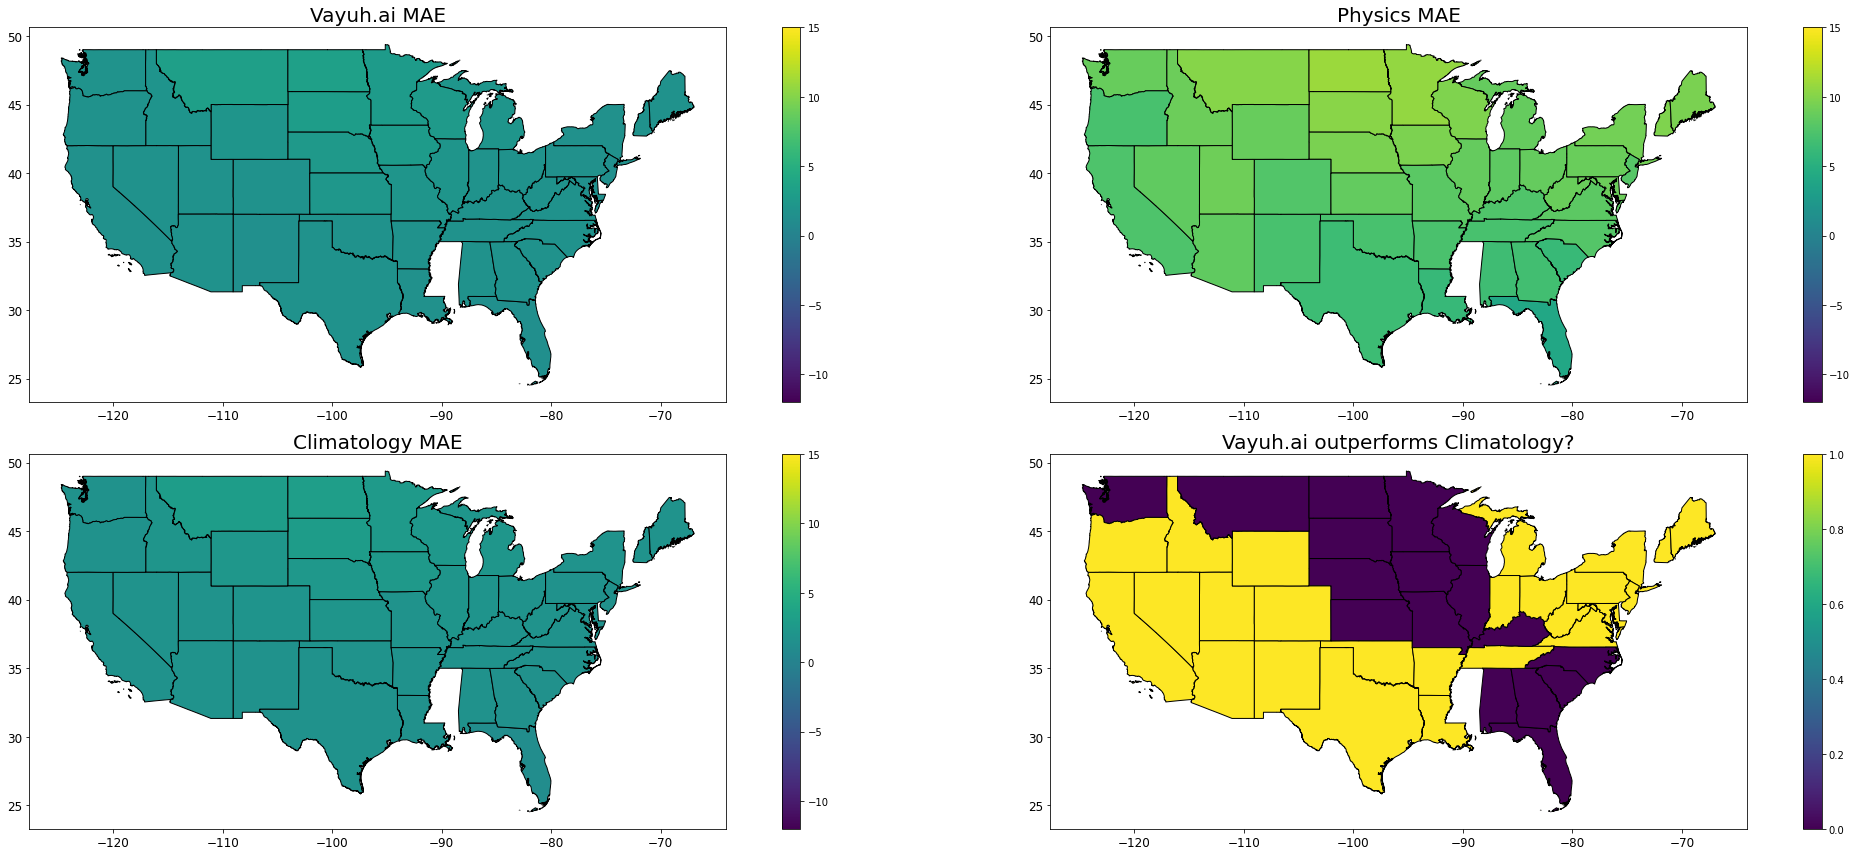

In [26]:
#Vayuh.ai MAE vs Physics MAE vs Climatology MAE
fig, axes = plt.subplots(figsize=(30,12), nrows = 2, ncols=2)
gdf.plot(ax=axes[0,0], column='Vayuh MAE', cmap='viridis', vmax=15, vmin=-12, linewidth=1, edgecolor='black', legend=True)
axes[0,0].set_title('Vayuh.ai MAE', fontsize=20)
axes[0,0].tick_params(labelsize=12)
gdf.plot(ax=axes[0,1], column='Physics MAE', cmap='viridis', vmax=15, vmin=-12, linewidth=1, edgecolor='black', legend=True)
axes[0,1].set_title('Physics MAE', fontsize=20)
axes[0,1].tick_params(labelsize=12)
gdf.plot(ax=axes[1,0], column='Climatology MAE', cmap='viridis', vmax=15, vmin=-12, linewidth=1, edgecolor='black', legend=True)
axes[1,0].set_title('Climatology MAE', fontsize=20)
axes[1,0].tick_params(labelsize=12)
gdf.plot(ax=axes[1,1], column='ml>clim', cmap='viridis', vmax=1, vmin=0, linewidth=1, edgecolor='black', legend=True)
axes[1,1].set_title('Vayuh.ai outperforms Climatology?', fontsize=20)
axes[1,1].tick_params(labelsize=12)
fig.tight_layout()

In [27]:
#Climatology comparisons by Season
indexlist = ['season']

vayuhpivot = pd.pivot_table(data=df_test2, index=indexlist, values='err', aggfunc=[mbe,mae,sd])
vayuhpivot.columns = list(map("_".join, vayuhpivot.columns))
vayuhpivot.rename(columns={"mbe_err":"Vayuh MBE", "mae_err":"Vayuh MAE", "sd_err":"Vayuh SD"}, inplace=True)
vayuhpivot

physicspivot = pd.pivot_table(data=df_test2, index=indexlist, values='phys_err', aggfunc=[mbe,mae,sd])
physicspivot.columns = list(map("_".join, physicspivot.columns))
physicspivot.rename(columns={"mbe_phys_err":"Physics MBE", "mae_phys_err":"Physics MAE", "sd_phys_err":"Physics SD"}, inplace=True)
physicspivot

climpivot = pd.pivot_table(data=df_test2, index=indexlist, values='clim_err', aggfunc=[mbe,mae,sd])
climpivot.columns = list(map("_".join, climpivot.columns))
climpivot.rename(columns={"mbe_clim_err":"Climatology MBE", "mae_clim_err":"Climatology MAE", "sd_clim_err":"Climatology SD"}, inplace=True)
climpivot

chartdata2 = pd.merge(vayuhpivot, physicspivot, on=indexlist)
chartdata2 = pd.merge(chartdata2, climpivot, on=indexlist)
chartdata2['ml>clim'] = chartdata2['Vayuh MAE'] < chartdata2['Climatology MAE']
chartdata2['phys>clim'] = chartdata2['Physics MAE'] < chartdata2['Climatology MAE']
chartdata2

,Vayuh MBE,Vayuh MAE,Vayuh SD,Physics MBE,Physics MAE,Physics SD,Climatology MBE,Climatology MAE,Climatology SD,ml>clim,phys>clim
season,,,,,,,,,,,
fall,0.590,2.445,3.134,-1.406,5.686,6.792,0.754,2.252,2.801,False,False
spring,0.134,1.726,2.215,-6.145,6.513,5.966,0.421,1.688,2.105,False,False
summer,-0.225,1.260,1.622,-12.097,12.274,7.559,-0.261,1.334,1.692,True,False
winter,0.573,2.647,3.677,5.174,8.291,11.032,0.457,2.844,3.800,True,False


ValueError: shape mismatch: objects cannot be broadcast to a single shape

<Figure size 432x288 with 0 Axes>

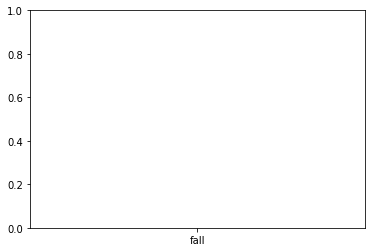

In [133]:
#Plotting by season
#figsize=(16,9)
fig = plt.figure()
#x = chartdata2.index))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(chartdata2.index, chartdata['Vayuh MAE'], width, label='Vayuh.ai MAE', color = '#0C58D3')
rects2 = ax.bar(chartdata2.index, chartdata['Physics MAE'], width, label='Physics MAE', color = '#06A723')
rects3 = ax.bar(chartdata2.index, chartdata['Climatology MAE'], width, label='Climatology MAE', color = 'red')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('errors', fontsize=12)
plt.xlabel("season", fontsize=12)
ax.set_title('Vayuh.AI forecasts vs Physics forecasts vs Climatology forecasts', fontsize=14)
ax.set_xticks(chartdata2.index)
ax.set_xticklabels(chartdata.index, fontsize=8)
ax.legend()

ax.bar_label(rects1, padding=3, fontsize=7)
ax.bar_label(rects2, padding=3, fontsize=7)
ax.bar_label(rects3, padding=3, fontsize=7)

fig.tight_layout()
plt.legend(prop={"size":10}, loc='upper left')
#plt.xticks(rotation=45, fontsize=10)
plt.show()
#fig.savefig('figs/'+'MAE_'+seasonchoice+'_'+'plot.png', dpi = 500)

In [28]:
#Climatology comparisons by Yearmonth
indexlist = ['year', 'month2']

vayuhpivot = pd.pivot_table(data=df_test2, index=indexlist, values='err', aggfunc=[mbe,mae,sd])
vayuhpivot.columns = list(map("_".join, vayuhpivot.columns))
vayuhpivot.rename(columns={"mbe_err":"Vayuh MBE", "mae_err":"Vayuh MAE", "sd_err":"Vayuh SD"}, inplace=True)
vayuhpivot

physicspivot = pd.pivot_table(data=df_test2, index=indexlist, values='phys_err', aggfunc=[mbe,mae,sd])
physicspivot.columns = list(map("_".join, physicspivot.columns))
physicspivot.rename(columns={"mbe_phys_err":"Physics MBE", "mae_phys_err":"Physics MAE", "sd_phys_err":"Physics SD"}, inplace=True)
physicspivot

climpivot = pd.pivot_table(data=df_test2, index=indexlist, values='clim_err', aggfunc=[mbe,mae,sd])
climpivot.columns = list(map("_".join, climpivot.columns))
climpivot.rename(columns={"mbe_clim_err":"Climatology MBE", "mae_clim_err":"Climatology MAE", "sd_clim_err":"Climatology SD"}, inplace=True)
climpivot

chartdata4 = pd.merge(vayuhpivot, physicspivot, on=indexlist)
chartdata4 = pd.merge(chartdata4, climpivot, on=indexlist)
chartdata4['ml>clim'] = chartdata4['Vayuh MAE'] < chartdata4['Climatology MAE']
chartdata4['phys>clim'] = chartdata4['Physics MAE'] < chartdata4['Climatology MAE']
chartdata4

Vayuh MBE  Vayuh MAE  Vayuh SD  Physics MBE  Physics MAE  \
year month2                                                             
2019 01          2.373      3.243     3.931        1.907        3.734   
     02          2.839      3.300     3.671       -1.218        3.991   
     03         -0.532      1.121     1.326       -5.120        5.225   
     04          0.154      1.652     2.022       -4.752        5.083   
     05          0.962      1.653     1.798       -3.430        3.631   
     06         -0.171      1.091     1.362       -2.857        3.330   
     07         -0.360      1.083     1.291      -13.874       14.706   
     08         -0.494      1.712     1.990      -17.002       17.002   
     09          0.642      2.648     3.033       -2.435        3.717   
     10          3.201      3.589     2.856       -5.492        5.820   
     11         -0.674      1.998     2.481        1.731        3.178   
     12         -2.152      2.731     2.528        0.499        2.575   
2020 01         -0.044      1.823     2.261       -2.112        2.921   
     02         -0.133      1.724     2.139       -4.741        5.338   
     03          1.054      1.960     2.261       -4.567        4.779   
     04          0.902      2.625     3.053       -5.593        6.937   
     05         -0.280      1.165     1.428      -18.914       18.914   
     06         -0.222      0.953     1.210       -8.016        8.016   
     07         -0.386      1.149     1.395      -11.281       11.281   
     08          0.663      1.660     2.038      -14.206       14.206   
     09          0.634      1.702     2.329        7.859        7.912   
     10         -0.005      2.072     2.656       -8.762        8.772   
     11         -0.923      2.561     3.420       -2.634        4.130   
     12         -0.676      2.351     3.069       19.047       19.047   
2021 01          3.166      3.680     4.361       25.245       25.245   
     02         -0.248      2.230     2.891        1.283        3.358   
     03         -0.712      2.114     2.523       -4.648        5.018   
     04          0.564      1.449     1.755       -1.518        2.302   
     05         -0.924      1.652     1.945       -7.880        7.889   
     06         -0.500      1.509     1.923      -11.005       11.005   
     07         -0.225      0.887     1.107      -21.807       21.807   

             Physics SD  Climatology MBE  Climatology MAE  Climatology SD  \
year month2                                                                 
2019 01           4.828            2.391            3.303           3.816   
     02           4.703            3.321            3.633           3.356   
     03           2.851            0.062            1.054           1.304   
     04           4.121            0.567            1.633           1.903   
     05           3.212            1.473            1.941           1.769   
     06           2.558            0.295            1.345           1.751   
     07          12.484           -0.230            1.010           1.246   
     08           3.154           -0.675            1.620           1.784   
     09           3.938            0.861            2.179           2.432   
     10           4.450            2.520            3.252           3.001   
     11           3.630            0.456            1.458           1.812   
     12           3.461           -2.107            3.003           3.000   
2020 01           3.157           -0.379            2.300           2.737   
     02           3.924           -0.352            1.971           2.448   
     03           3.775            0.819            2.121           2.448   
     04           5.427            0.378            2.188           2.655   
     05           3.765            0.140            1.116           1.423   
     06           3.518           -0.257            1.304           1.648   
     07           2.572           -0.621            1.146      

In [149]:
#Climatology comparisons during heatwaves
df_test3 = df_test2[df_test2['heatwave']]
indexlist = ['State']

vayuhpivot = pd.pivot_table(data=df_test3, index=indexlist, values='err', aggfunc=[mbe,mae,sd])
vayuhpivot.columns = list(map("_".join, vayuhpivot.columns))
vayuhpivot.rename(columns={"mbe_err":"Vayuh MBE", "mae_err":"Vayuh MAE", "sd_err":"Vayuh SD"}, inplace=True)
vayuhpivot

physicspivot = pd.pivot_table(data=df_test3, index=indexlist, values='phys_err', aggfunc=[mbe,mae,sd])
physicspivot.columns = list(map("_".join, physicspivot.columns))
physicspivot.rename(columns={"mbe_phys_err":"Physics MBE", "mae_phys_err":"Physics MAE", "sd_phys_err":"Physics SD"}, inplace=True)
physicspivot

climpivot = pd.pivot_table(data=df_test3, index=indexlist, values='clim_err', aggfunc=[mbe,mae,sd])
climpivot.columns = list(map("_".join, climpivot.columns))
climpivot.rename(columns={"mbe_clim_err":"Climatology MBE", "mae_clim_err":"Climatology MAE", "sd_clim_err":"Climatology SD"}, inplace=True)
climpivot

chartdata5 = pd.merge(vayuhpivot, physicspivot, on=indexlist)
chartdata5 = pd.merge(chartdata5, climpivot, on=indexlist)
chartdata5['ml>clim'] = chartdata5['Vayuh MAE'] < chartdata5['Climatology MAE']
chartdata5['phys>clim'] = chartdata5['Physics MAE'] < chartdata5['Climatology MAE']
chartdata5

,Vayuh MBE,Vayuh MAE,Vayuh SD,Physics MBE,Physics MAE,Physics SD,Climatology MBE,Climatology MAE,Climatology SD,ml>clim,phys>clim
State,,,,,,,,,,,
Arizona,-1.393,1.449,0.936,-14.311,14.311,6.453,-0.746,0.912,0.978,False,False
California,-2.099,2.099,1.126,-16.729,16.729,5.289,-1.488,1.488,0.832,False,False


In [151]:
#Climatology comparisons by Yearmonth
df_test3 = df_test2[df_test2['coldwave']]
indexlist = ['State']

vayuhpivot = pd.pivot_table(data=df_test3, index=indexlist, values='err', aggfunc=[mbe,mae,sd])
vayuhpivot.columns = list(map("_".join, vayuhpivot.columns))
vayuhpivot.rename(columns={"mbe_err":"Vayuh MBE", "mae_err":"Vayuh MAE", "sd_err":"Vayuh SD"}, inplace=True)
vayuhpivot

physicspivot = pd.pivot_table(data=df_test3, index=indexlist, values='phys_err', aggfunc=[mbe,mae,sd])
physicspivot.columns = list(map("_".join, physicspivot.columns))
physicspivot.rename(columns={"mbe_phys_err":"Physics MBE", "mae_phys_err":"Physics MAE", "sd_phys_err":"Physics SD"}, inplace=True)
physicspivot

climpivot = pd.pivot_table(data=df_test3, index=indexlist, values='clim_err', aggfunc=[mbe,mae,sd])
climpivot.columns = list(map("_".join, climpivot.columns))
climpivot.rename(columns={"mbe_clim_err":"Climatology MBE", "mae_clim_err":"Climatology MAE", "sd_clim_err":"Climatology SD"}, inplace=True)
climpivot

chartdata6 = pd.merge(vayuhpivot, physicspivot, on=indexlist)
chartdata6 = pd.merge(chartdata6, climpivot, on=indexlist)
chartdata6['ml>clim'] = chartdata6['Vayuh MAE'] < chartdata6['Climatology MAE']
chartdata6['phys>clim'] = chartdata6['Physics MAE'] < chartdata6['Climatology MAE']
chartdata6

,Vayuh MBE,Vayuh MAE,Vayuh SD,Physics MBE,Physics MAE,Physics SD,Climatology MBE,Climatology MAE,Climatology SD,ml>clim,phys>clim
State,,,,,,,,,,,
Colorado,4.672,4.672,2.958,11.396,11.396,9.127,1.805,2.048,1.694,False,False
Illinois,9.446,9.446,1.670,27.849,27.849,10.883,3.901,3.901,0.509,False,False
Iowa,7.406,7.406,3.282,18.134,18.134,13.814,2.325,3.065,2.885,False,False
Kansas,12.504,12.504,0.337,36.226,36.226,1.004,4.589,4.589,0.405,False,False
Maine,1.140,1.769,1.591,7.213,9.678,13.608,1.482,1.547,0.952,False,False
Michigan,4.808,4.808,1.270,15.326,15.326,11.695,2.128,2.340,1.469,False,False
Minnesota,4.524,5.199,3.944,14.530,15.362,13.853,1.986,3.180,3.032,False,False
Missouri,11.784,11.784,0.974,34.403,34.403,0.509,4.848,4.848,0.439,False,False
Montana,12.178,12.178,3.627,16.885,16.901,13.981,4.660,4.714,2.022,False,False


In [155]:
#P7 - By extreme events: Texas cold wave (06 Feb to 22 Feb 2021) (14 day differences)
texascoldwave = df_test2[(df_test2['start_date']>='2021-01-23') & (df_test2['start_date']<='2021-02-28')]
texascoldwave

indexlist = ['State']

vayuhpivot = pd.pivot_table(data=texascoldwave, index=indexlist, values='err', aggfunc=[mbe,mae,sd])
vayuhpivot.columns = list(map("_".join, vayuhpivot.columns))
vayuhpivot.rename(columns={"mbe_err":"Vayuh MBE", "mae_err":"Vayuh MAE", "sd_err":"Vayuh SD"}, inplace=True)
vayuhpivot

physicspivot = pd.pivot_table(data=texascoldwave, index=indexlist, values='phys_err', aggfunc=[mbe,mae,sd])
physicspivot.columns = list(map("_".join, physicspivot.columns))
physicspivot.rename(columns={"mbe_phys_err":"Physics MBE", "mae_phys_err":"Physics MAE", "sd_phys_err":"Physics SD"}, inplace=True)
physicspivot

climpivot = pd.pivot_table(data=texascoldwave, index=indexlist, values='clim_err', aggfunc=[mbe,mae,sd])
climpivot.columns = list(map("_".join, climpivot.columns))
climpivot.rename(columns={"mbe_clim_err":"Climatology MBE", "mae_clim_err":"Climatology MAE", "sd_clim_err":"Climatology SD"}, inplace=True)
climpivot

chartdata6 = pd.merge(vayuhpivot, physicspivot, on=indexlist)
chartdata6 = pd.merge(chartdata6, climpivot, on=indexlist)
chartdata6['ml>clim'] = chartdata6['Vayuh MAE'] < chartdata6['Climatology MAE']
chartdata6['phys>clim'] = chartdata6['Physics MAE'] < chartdata6['Climatology MAE']
#scaling climatology with time (not based on new inputs, just history) - Mackey (predict anomaly) subtract clim and predict residual; moceal can only improve on clim (not predict 0); transform the training

,Vayuh MBE,Vayuh MAE,Vayuh SD,Physics MBE,Physics MAE,Physics SD,Climatology MBE,Climatology MAE,Climatology SD,ml>clim,phys>clim
State,,,,,,,,,,,
Alabama,1.031,2.043,2.533,1.169,6.795,9.517,0.972,1.685,1.944,False,False
Arizona,1.960,2.058,1.367,5.326,5.795,6.903,0.036,0.776,1.023,False,False
Arkansas,2.107,4.225,5.206,4.494,9.284,13.229,1.904,3.921,4.163,False,False
California,2.264,2.273,1.548,7.364,7.364,4.930,-0.041,0.556,0.670,False,False
Colorado,2.176,2.664,3.497,8.691,8.874,10.170,0.884,2.189,2.721,False,False
Florida,-0.146,1.362,1.616,1.745,1.954,2.621,-0.448,1.092,1.429,False,False
Georgia,0.154,0.762,0.910,0.435,5.793,7.746,0.372,1.170,1.338,True,False
Idaho,1.447,1.599,1.341,7.081,7.593,9.238,0.667,1.910,2.080,True,False
Illinois,1.361,4.404,5.285,7.065,9.430,13.796,1.477,3.443,3.908,False,False


In [ ]:
#Geoplotting statewise comparisons